# Introduction


## 1. Import libraries

In [ ]:
pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

## 2. Import Dataset

In [47]:
df=pd.read_csv('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/Darsman_Exercises/term 5/3 - Air pollution/Air_pollution_ dataset.csv', delimiter=';')
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


## 3. Air Pollution Dataset Overview

### General Information
- **File Name**: `Air_pollution_dataset.csv`
- **File Format**: CSV (Comma-Separated Values)
- **Delimiter**: Semicolon (`;`)
- **Number of rows**: 9470
- **Number of Columns**: 16

## Columns Description
1. **Date**: The date of the recorded data (format: `DD/MM/YYYY`).
2. **Time**: The time of the recorded data (format: `HH.MM.SS`).
3. **CO(GT)**: Carbon monoxide concentration (mg/m³).
4. **PT08.S1(CO)**: Tin oxide sensor response for CO (non-standardized).
5. **NMHC(GT)**: Non-methane hydrocarbons concentration (µg/m³).
6. **C6H6(GT)**: Benzene concentration (µg/m³).
7. **PT08.S2(NMHC)**: Titania sensor response for NMHC (non-standardized).
8. **NOx(GT)**: Nitrogen oxides concentration (µg/m³).
9. **PT08.S3(NOx)**: Tungsten oxide sensor response for NOx (non-standardized).
10. **NO2(GT)**: Nitrogen dioxide concentration (µg/m³).
11. **PT08.S4(NO2)**: Tungsten oxide sensor response for NO2 (non-standardized).
12. **PT08.S5(O3)**: Indium oxide sensor response for O3 (non-standardized).
13. **T**: Temperature (°C).
14. **RH**: Relative humidity (%).
15. **AH**: Absolute humidity (g/m³)
16. **Empty Column**: An empty column with no data.

## Data Characteristics
- The dataset contains hourly measurements of various air pollutants and environmental conditions.
- Some entries contain missing or invalid data, represented by `-200`.

## Notes
- Ensure to handle missing or invalid data (`-200`) appropriately during analysis.
- The dataset may require cleaning before use in machine learning models.e use in machine learning models.

In [4]:
df.shape

(9471, 17)

In [5]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [17]:
df.duplicated().sum()

113

### 3.1 Missing values visualize

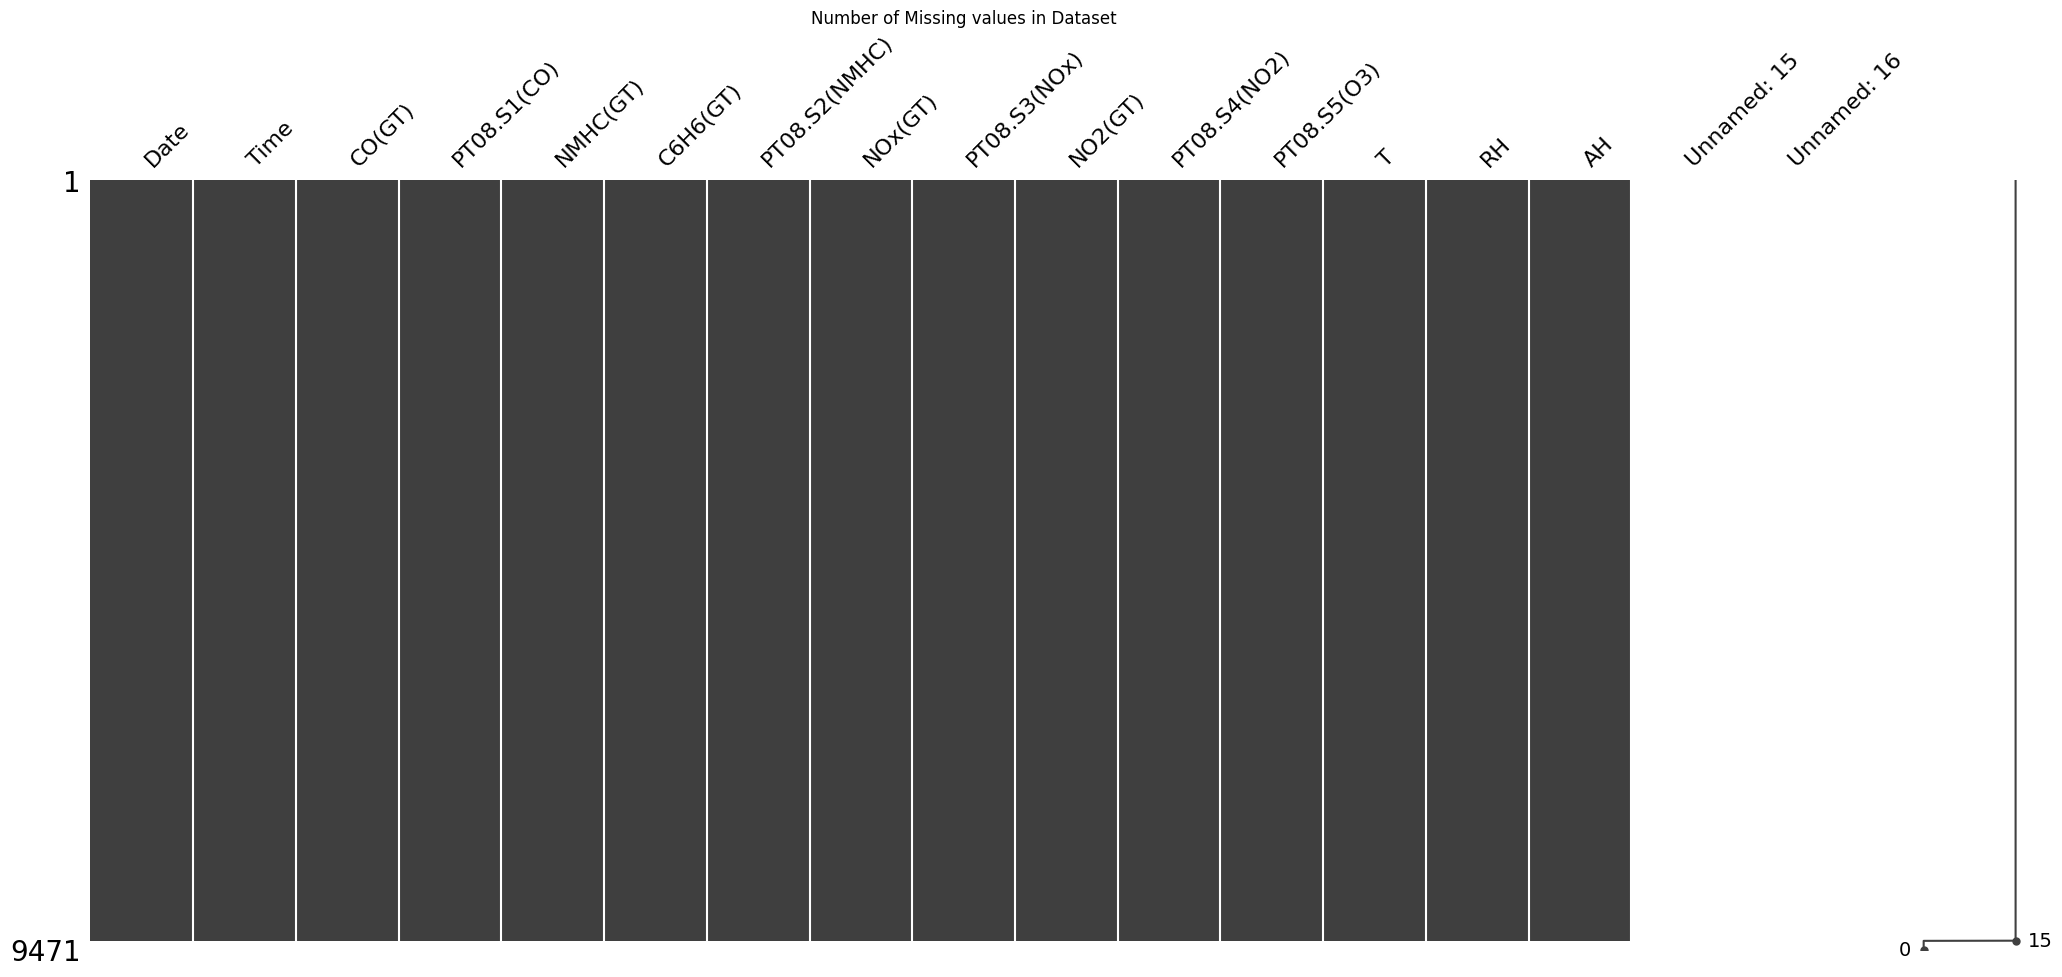

In [6]:
# Missing values visualize with Matrix
msno.matrix(df)
plt.title('Number of Missing values in Dataset')
plt.show()

## *White line shows Null values*

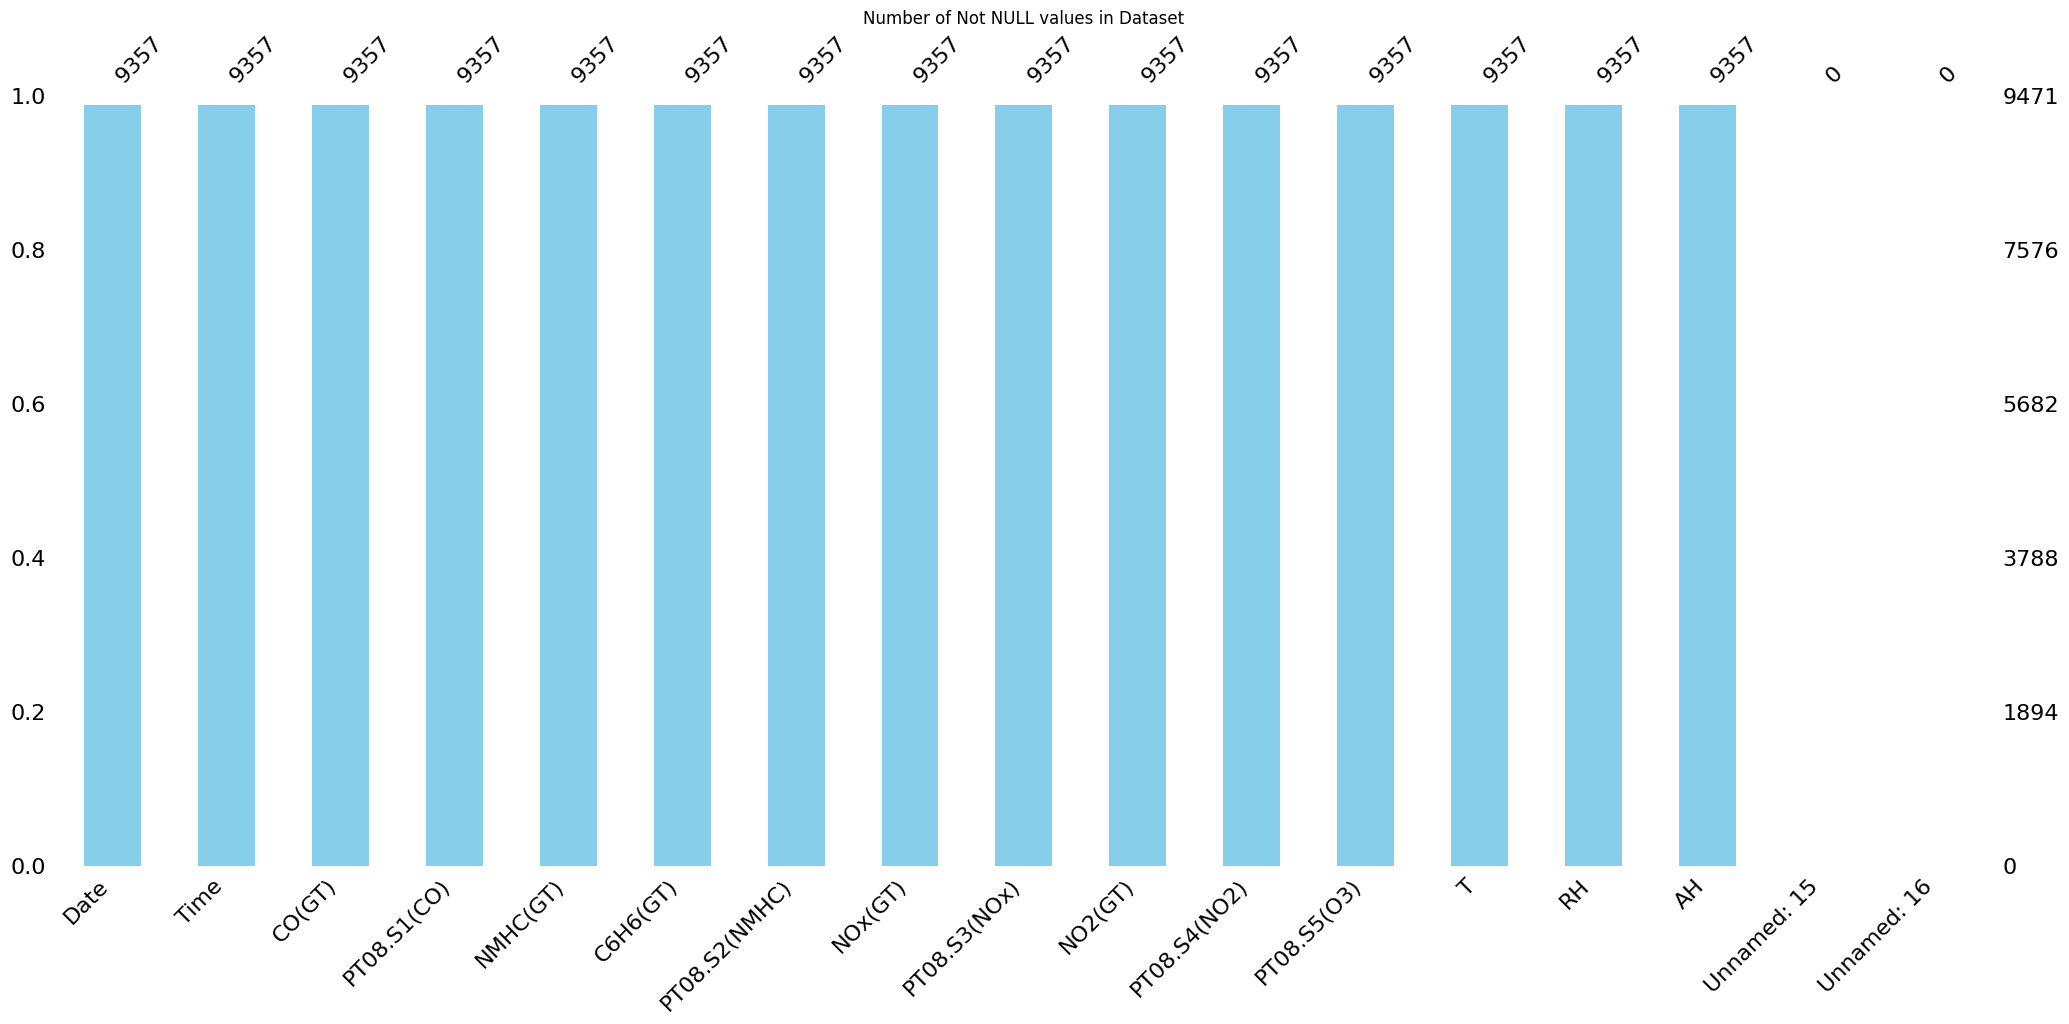

In [7]:
# Missing values visualize with Bar
msno.bar(df, color="skyblue")
plt.title("Number of Not NULL values in Dataset")
plt.show()

## *Each line shows **NotNull** values*

In [8]:
# Uniqe Values of each columns
pd.DataFrame(df.nunique(), columns=['Number of unique values'])

,Number of unique values
Date,391
Time,24
CO(GT),104
PT08.S1(CO),1042
NMHC(GT),430
C6H6(GT),408
PT08.S2(NMHC),1246
NOx(GT),926
PT08.S3(NOx),1222
NO2(GT),284


In [9]:
# function to return Top value number
def Value_count(col,Top_no=10):
    """
    Returns the top N unique values and their counts for a specified column.

    Parameters:
    - col (str): The column name for which to calculate value counts.
    - top_n (int): The number of top unique values to return (default is 10).

    Returns:
    - pd.DataFrame: A DataFrame containing the top N unique values and their counts.
    """
    return pd.DataFrame(df[col].value_counts()).head(Top_no)

In [10]:
Value_count('Time')

,count
Time,
18.00.00,390
05.00.00,390
14.00.00,390
13.00.00,390
12.00.00,390
11.00.00,390
10.00.00,390
09.00.00,390
08.00.00,390


In [73]:
Value_count('CO(GT)',20)

,count
CO(GT),
-200,1592
"1,4",279
"1,6",275
"1,5",273
"1,1",262
"0,7",260
"1,7",258
"1,3",253
"0,8",251


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0,1053.0,1221.0,2040.0
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0,-200.0,-200.0,1189.0
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0,895.0,1105.0,2214.0
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0,141.0,284.0,1479.0
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0,794.0,960.0,2683.0
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0,96.0,133.0,340.0
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0,1446.0,1662.0,2775.0
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0,942.0,1255.0,2523.0
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Numeric Columns Summary1. **CO(GT)** : Min Value is -200 and Max Value is 11.9 (mg/m³). The type of this column shoud changed to **Foalt**.
2. **PT08.S1(CO)** : Min Value is 647 and Max Value is 2040.
3. **NMHC(GT)** : Min Value is -200 and Max Value is 1189 (µg/m³).
4. **C6H6(GT)** : Min Value is 0.5 and Max Value is 63.7 (µg/m³).
5. **PT08.S2(NMHC)** : Min Value is 457 and Max Value is 2214.
6. **NOx(GT)** : Min Value is -200 and Max Value is 1479 (µg/m³).
7. **PT08.S3(NOx)** : Min Value is 322 and Max Value is 2683.
8. **NO2(GT)** : Min Value is -200 and Max Value is340 (µg/m³).
9. **PT08.S4(NO2)** : Min Value is 853 and Max Value is 3236.
10. **PT08.S5(O3)** : Min Value is 221 and Max Value is 2526.
11. **T** : Min Value is -1.9 and Max Value is 44.6 Temperature (°C). The type of this column shoud changed to **Foalt**.
12. **RH** : Min Value is 9.2 and Max Value is 88.7 Relative Humidity (%). The type of this column shoud changed to **Foalt**.
13. **AH** : Min Value is 0.18 and Max Value is 2.23 Absolute Humidity (g/m³). The type of this column shoud changed to **Foalt**.
             

### Key Observations:
1. **Missing Data Flags**: -200 values indicate sensor missing readings
2. **Pollution Ranges**:
   - CO typically ranges 0-12 mg/m³ (max 11.9)
   - NOx shows wide variation (0-1479 µg/m³)
3. **Sensor Responses**:
   - All PT08 sensors show significant measurement ranges
   - O3 sensor (PT 0]  # Remove missing data flags

## 4. Data cleaning

In [48]:
# Drop entirely null columns
df.dropna(axis=1, how='all', inplace=True)
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [49]:
# Drop entirely null columns
df.dropna(axis=1, how='all', inplace=True)
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [50]:
# Drop entirely null rows
df.dropna(axis=0, how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

### 4.1 change 'Date' column type to Datetime

In [51]:
df['Date']=pd.to_datetime(df['Date'], format= 'mixed')

### 4.2 change 'Time' column to 'Hour'

In [52]:
# replace '.' with ':'  for modify format
df['Time']=df['Time'].str.replace('.', ':')

# change 'Time' column type to datetime and Hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Rename columns from 'Time' to 'Hour'
df=df.rename(columns={ 'Time' : 'Hour' })

### 4.3 change columns type from object to float for 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'

In [53]:
def change_columns_type (columns):
    '''
    Convert specified columns to numeric type, handling decimal separators.
    Parameters:
    -----------
    columns: List of column names to convert
    '''
    for col in columns:
        # replace ',' with '.' for each column
        df[col] = df[col].str.replace(',', '.')
        
        # change 'col' column type to float
        df[col] = df[col].astype('float')

In [54]:
change_columns_type(['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Hour           9357 non-null   int32         
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), floa

### 4.4 Replace -200 with NaN for Dataset
**columns effected** : all columns except *Data* and *Hour*

In [57]:
df.replace(-200, np.nan, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Hour           9357 non-null   int32         
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), floa

In [58]:
df.isna().sum()

Date                0
Hour                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### 4.5 Since the 'NMHC(GT)' column contains many null values, we will drop it from the dataset.

In [61]:
# Drop entirely 'NMHC(GT)' column
df.drop(columns=['NMHC(GT)'], axis=0, inplace=True)
df.isnull().sum()

Date                0
Hour                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### 4.6 Fill null values for float columns based on 'Hour' column

In [62]:
for col in df.columns:
    if df[col].dtype == float:
        df[col] = df.groupby('Hour')[col].transform( lambda x: x.fillna(x.mean()))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Hour           9357 non-null   int32         
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int32(1)
memory usage: 1.0 MB


In [ ]:
'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'